### Import Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector 

- Note: `..` means go one level up (parent directory). In this case we go from `Notebook` to project root directory `Credit launch analytics`. After we can read the file.

- if we used `dataset/transactions.csv` Python would look for `Notebook/dataset/transaction.csv`

In [2]:
df_cust = pd.read_csv('../dataset/customers.csv')
display(df_cust.head())
print(df_cust.shape)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


(1000, 8)


In [3]:
df_cs = pd.read_csv("../dataset/credit_profiles.csv")
df_trans = pd.read_csv("../dataset/transactions.csv")
display(df_cs.head())
print(df_cs.shape)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


(1004, 6)


In [4]:
display(df_trans.head())
print(df_trans.shape)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


(500000, 7)


In [5]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='s123',
    database='e_master_card'
)

conn

In [6]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


- Outliers are there for age min can't be 1
- Outliers are there for annual income as minimum cannot be 2


In [7]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

### Handling NA values for annual income 
- replace null values with median

In [8]:
df_cust[df_cust['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married


In [9]:
occupation_wise_inc_median = df_cust.groupby("occupation")['annual_income'].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [10]:
df_cust['annual_income'] = df_cust.apply(lambda row:occupation_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],axis=1)
df_cust.iloc[[14,82,97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,45794.0,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,46759.0,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,261191.5,Married


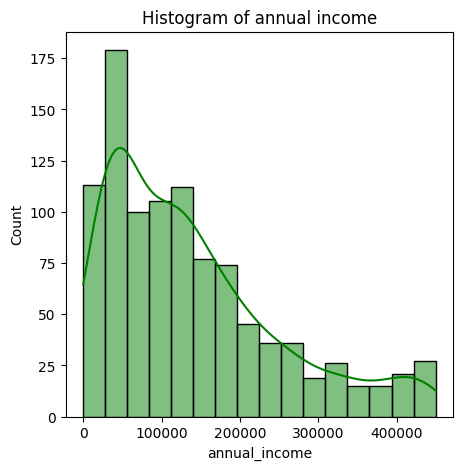

In [11]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust["annual_income"],kde=True,color='green',label="Data")
plt.title("Histogram of annual income")
plt.show()

### Treating outliers from annual income

In [12]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


Anything below $100 annual_income is an outlier

In [13]:
df_cust[df_cust['annual_income'] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,50.0,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,50.0,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,50.0,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,50.0,Married
340,341,Ridhi Rastogi,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Gauri Gupta,Male,54,City,Consultant,2.0,Married
592,593,Vivaan Pande,Female,32,City,Business Owner,50.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,2.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,2.0,Married
696,697,Avani Lalwani,Male,47,City,Consultant,20.0,Married


Replacing the outliers for annual income with occupation wise median annual income

In [14]:
df_cust.at[31,"annual_income"]

np.float64(50.0)

In [15]:
for index,row in df_cust.iterrows():
    if row['annual_income'] < 100:
        df_cust.at[index,"annual_income"] = occupation_wise_inc_median[row['occupation']] 
        

In [16]:
df_cust[df_cust['annual_income'] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [17]:
df_cust.iloc[[31,262]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,261191.5,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,261191.5,Married


### Data Visualization for annual income

In [18]:
avg_income_per_occupation = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [19]:
avg_income_per_occupation.index 

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [20]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

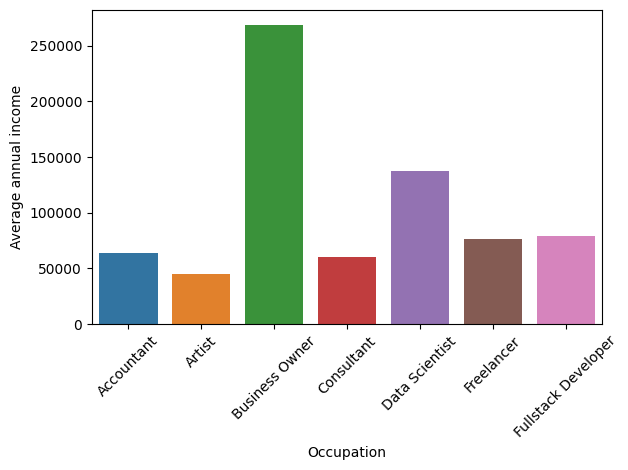

In [21]:
sns.barplot(x=avg_income_per_occupation.index,
            y=avg_income_per_occupation.values,
            palette='tab10',
            hue=avg_income_per_occupation.index)
plt.xlabel("Occupation")
plt.ylabel("Average annual income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Business owners get the highest avg annual_income
- Artists get the lowest avg annual_income

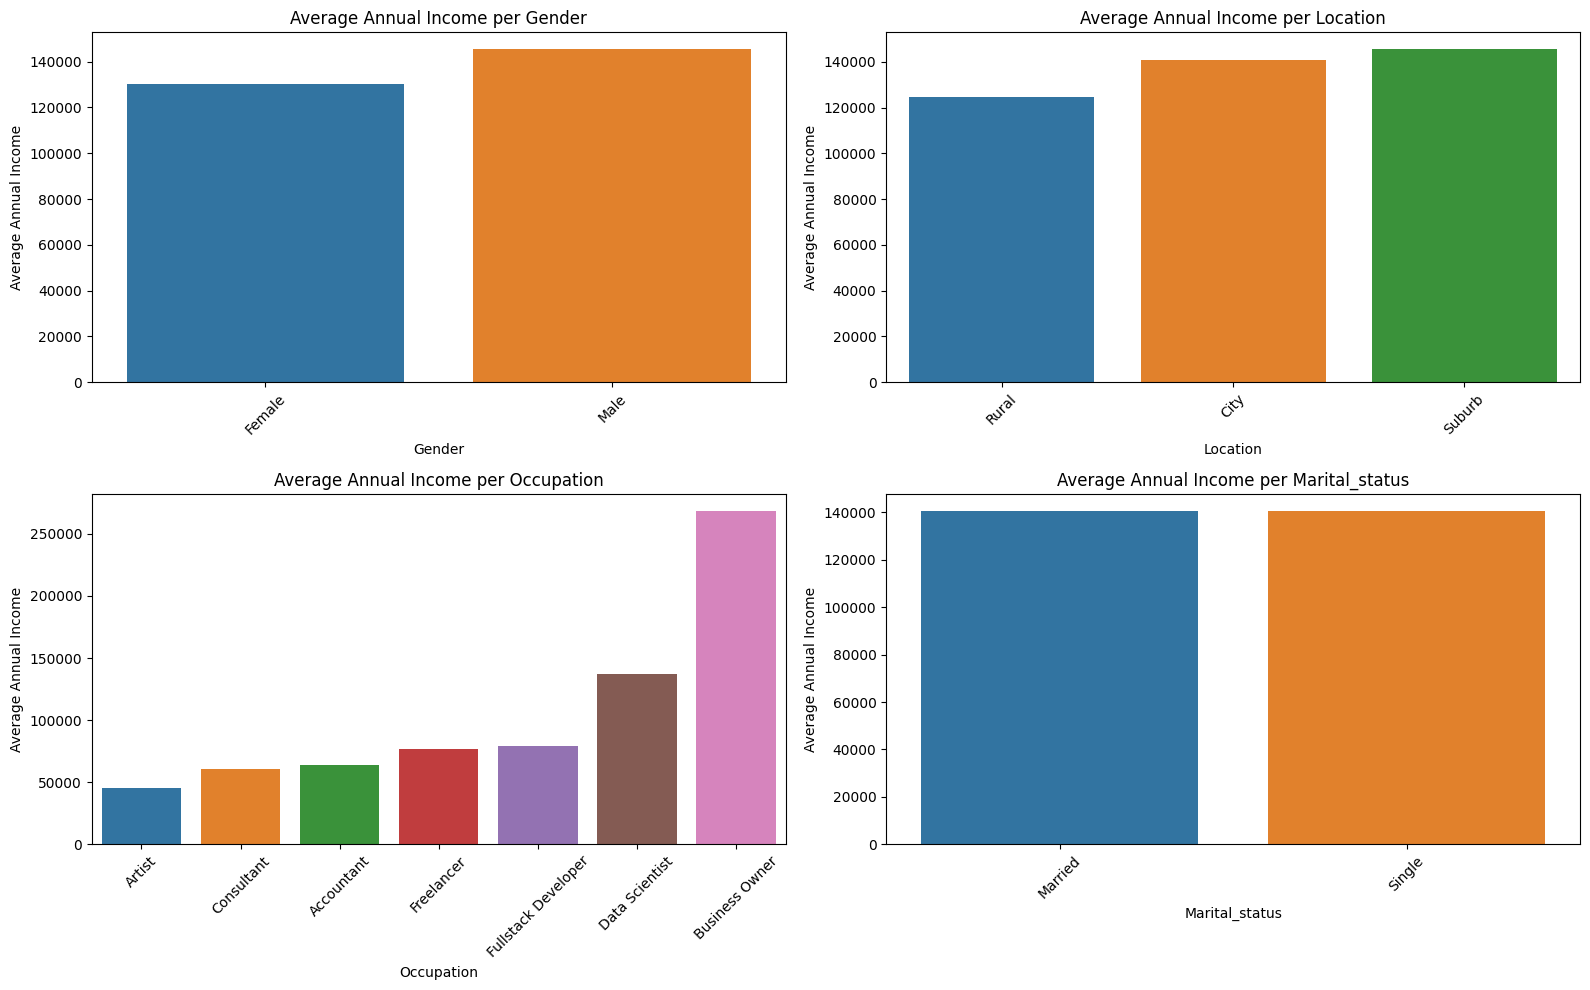

In [22]:
categorical_columns = ["gender","location","occupation","marital_status"]

fig,axs = plt.subplots(2,2,figsize=(16,10))
axes = axs.flatten()

for i,col in enumerate(categorical_columns): 
    
    avg_income_per_grp = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_grp.index,
                y=avg_income_per_grp.values,
                palette='tab10',
                hue=avg_income_per_grp.index,
                ax=axes[i])
    
    axes[i].set_title(f"Average Annual Income per {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Average Annual Income")
    axes[i].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

- Males earning is more than females
- People in suburbs earn more than people in cities and rural areas 
- Business owners earn the most avg annual income 
- There is no difference in earnings of single or married people in avg income

### Treating the outliers from age

In [23]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [24]:
outliers_age = df_cust[(df_cust["age"] < 15) | (df_cust['age'] > 80)]
outliers_age.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married


In [25]:
print(outliers_age.shape)

(20, 8)


In [26]:
occupation_wise_median_age = df_cust.groupby('occupation')['age'].median()
occupation_wise_median_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

Valid age median: [15-80]

In [27]:
for index,row in df_cust.iterrows():
    if row['age'] < 15 or row['age'] > 80:
        df_cust.at[index,'age'] = occupation_wise_median_age[row['occupation']].astype("int64")
        

In [28]:
df_cust.iloc[[0,41]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,26,City,Artist,7621.0,Married


In [29]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.539000,140483.548500
std,288.819436,12.277998,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


### Data Visualization for Age,Gender,Location

Creating age_grp feature 

To convert numerical features to categorical we can use pd.cut

In [30]:
bin_edges = [17,25,48,65]
labels = ["18-25","20-48","49-65"]
df_cust['age_group'] = pd.cut(df_cust['age'],bins=bin_edges,labels=labels)

In [31]:
age_grp_counts = df_cust['age_group'].value_counts(normalize=True)*100
age_grp_counts

age_group
20-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

In [32]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,20-48
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,20-48


In [33]:
age_grp_counts.index

CategoricalIndex(['20-48', '18-25', '49-65'], categories=['18-25', '20-48', '49-65'], ordered=True, dtype='category', name='age_group')

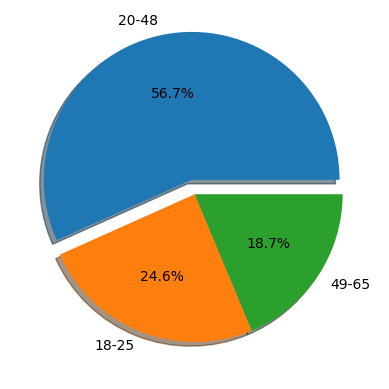

In [34]:
plt.pie(age_grp_counts,
        labels=age_grp_counts.index,
        autopct="%1.1f%%",
        shadow=True,
        explode=(0.1,0,0)) # 0.1 is the distance from the center
plt.show()

### Stacked bar plot showing count of customers locations wise wrt to gender


In [35]:
location_wise_gender_counts = df_cust.groupby(['location','gender']).size()
location_wise_gender_counts

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [36]:
cust_loc_gender_df = location_wise_gender_counts.unstack()
cust_loc_gender_df

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


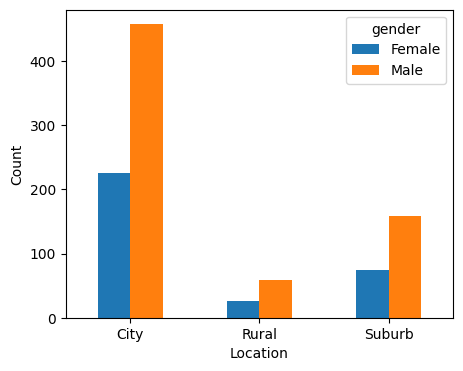

In [37]:
cust_loc_gender_df.plot(kind='bar',figsize=(5,4))
plt.xticks(rotation=0)
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

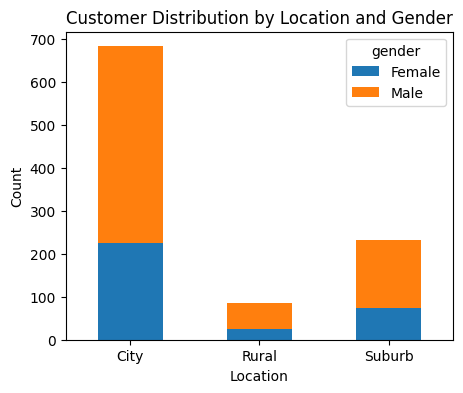

In [38]:
cust_loc_gender_df.plot(kind='bar',stacked=True,figsize=(5,4))
plt.xticks(rotation=0)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Customer Distribution by Location and Gender")
plt.show()

### Data cleaning: Credit Score

In [39]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [40]:
print("no of unique customer ids:",df_cs['cust_id'].nunique())

no of unique customer ids: 1000


In [41]:
print("credit_score_df shape:",df_cs.shape)
print("customers_df shape:",df_cust.shape)

credit_score_df shape: (1004, 6)
customers_df shape: (1000, 9)


Addressing the duplicates

In [42]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [43]:
df_cs_clean_1 = df_cs.drop_duplicates(subset=['cust_id'],keep='last')
df_cs_clean_1.shape

(1000, 6)

In [44]:
df_cs_clean_1[df_cs_clean_1['cust_id'].duplicated()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [45]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

Addressing null values for credit_limit

In [46]:
df_cs_clean_1[df_cs_clean_1['credit_limit'].isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN


Credit limit is determined by the credit score. Higher the credit score, higher the credit limit.

In [47]:
df_cs_clean_1['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

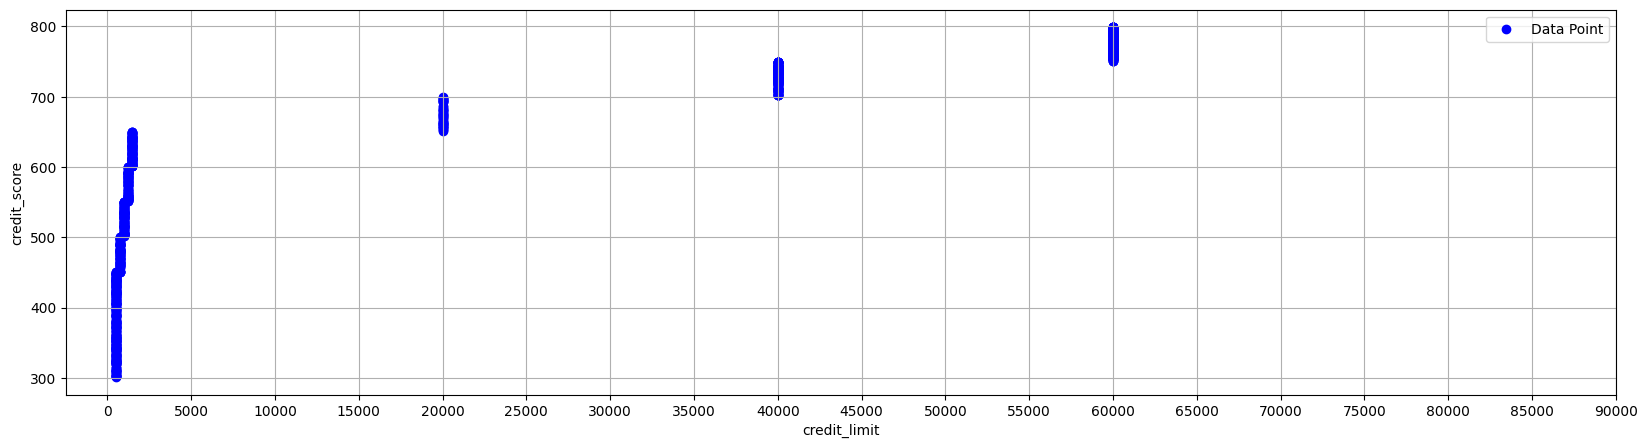

In [48]:
plt.figure(figsize=(20,5))
plt.scatter(df_cs_clean_1['credit_limit'],
            df_cs_clean_1['credit_score'],
            c='blue',marker='o',
            label="Data Point")
plt.xlabel("credit_limit")
plt.ylabel("credit_score")
plt.legend()
plt.xticks(range(0,90001,5000))
plt.grid()
plt.show()

In [49]:
bin_ranges = [300,450,500,550,600,700,750,800]
bin_labels = [f"{start}-{end-1}" for start,end in zip(bin_ranges,bin_ranges[1:])]

df_cs_clean_1['credit_score_range']= pd.cut(df_cs_clean_1['credit_score'],
                                            bins=bin_ranges,
                                            labels=bin_labels,
                                            include_lowest=True,
                                            right=False)

C:\Users\rsurs\AppData\Local\Temp\ipykernel_51180\3712217299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean_1['credit_score_range']= pd.cut(df_cs_clean_1['credit_score'],


In [50]:
df_cs_clean_1[df_cs_clean_1['credit_score_range'] == "700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [51]:
mode_df = (
    df_cs_clean_1
    .groupby("credit_score_range", observed=True)['credit_limit'] # observed means include all categories
    .agg(lambda x: x.mode().iloc[0])
    .reset_index()
)


In [52]:
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-699,1500.0
5,700-749,40000.0
6,750-799,60000.0


In [53]:
df_cs_clean_1[df_cs_clean_1['credit_limit'].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
617,615,776,0.278907,14937.0,0.0,NaN,750-799
666,663,478,0.154754,84.0,0.0,NaN,450-499
10,11,679,0.557450,9187.0,2.0,NaN,600-699


In [54]:
pd.merge(df_cs_clean_1,mode_df,on="credit_score_range")

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit_x,credit_score_range,credit_limit_y
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [55]:
df_cs_clean_2 = pd.merge(df_cs_clean_1,mode_df,on="credit_score_range",suffixes=("","_mode"))

df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
857,858,797,0.726248,25807.0,4.0,60000.0,750-799,60000.0
135,136,643,0.328694,375.0,4.0,1500.0,600-699,1500.0
649,650,718,0.233141,7154.0,4.0,40000.0,700-749,40000.0


In [56]:
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'] = df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'])
print(df_cs_clean_3.shape)

(1000, 8)


In [57]:
df_cs_clean_3.iloc[701]

cust_id                                702
credit_score                           769
credit_utilisation                0.887919
outstanding_debt                   37308.0
credit_inquiries_last_6_months         4.0
credit_limit                       60000.0
credit_score_range                 750-799
credit_limit_mode                  60000.0
Name: 701, dtype: object

In [58]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19715.250000,19061.500
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24724.161039,25138.741
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000


Outliers exist in `outstanding_debt` (max = 209901) if we checked the `credit_limit` (max = 60000)

<Axes: xlabel='outstanding_debt'>

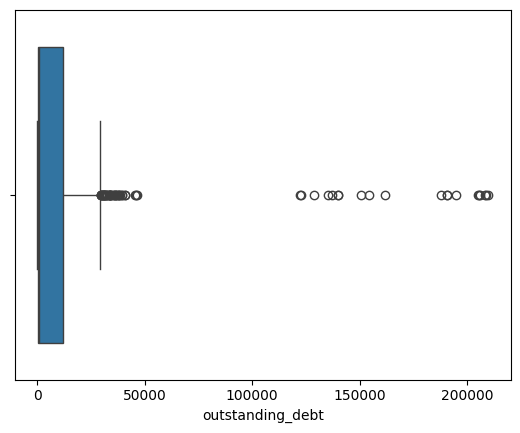

In [59]:
sns.boxplot(x=df_cs_clean_3['outstanding_debt'])

While removing outliers always try to see how we can use business domain approach to remove outliers 

In [60]:
display(df_cs_clean_3[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit']])
print(df_cs_clean_3[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit']].shape)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
10,11,679,0.557450,9187.0,2.0,1500.0,600-699,1500.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-699,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0


(21, 8)


In [61]:
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'],'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [62]:
df_cs_clean_3[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit']] 

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [63]:
df_cs_clean_3.loc[[6,12]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
12,13,476,0.822498,318.0,3.0,750.0,450-499,750.0


### Correlationship among profile variables

In [64]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [65]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,20-48
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,20-48


In [66]:
df_merged = df_cust.merge(df_cs_clean_3,on="cust_id",how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,20-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,20-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [67]:
numerical_cols = ["credit_score",
                  "credit_utilisation",
                  "outstanding_debt",
                  "credit_limit",
                  "annual_income",
                  "age"]

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix


,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680160,0.847279,0.575751,0.444961
credit_utilisation,-0.070445,1.000000,0.192638,-0.080659,-0.086368,-0.027828
outstanding_debt,0.680160,0.192638,1.000000,0.810645,0.556015,0.444127
credit_limit,0.847279,-0.080659,0.810645,1.000000,0.685015,0.510741
annual_income,0.575751,-0.086368,0.556015,0.685015,1.000000,0.619103
age,0.444961,-0.027828,0.444127,0.510741,0.619103,1.000000


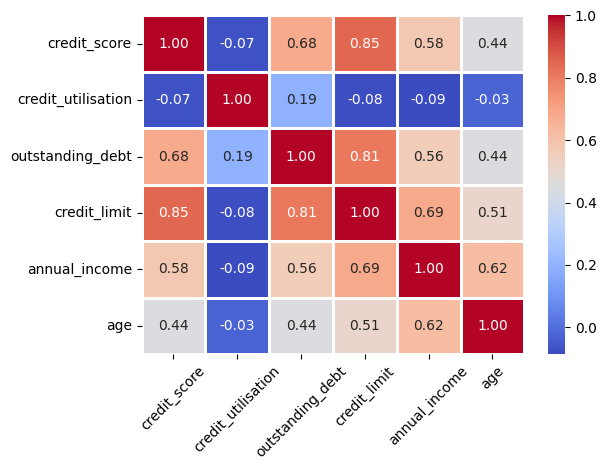

In [68]:
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.8,
            annot=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Strong correlation between `credit_score` and `credit_limit`.
- Strong correlation between `outstanding debt` and `credit_limit`.


### Handling null values for transactions table

In [69]:
df_trans = pd.read_csv("../dataset/transactions.csv")
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [70]:
print(df_trans.shape)

(500000, 7)


In [71]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [72]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [73]:
df_trans[df_trans['platform'].isnull()].sample(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
378335,378336,705,2023-07-07,54,NaN,Fashion & Apparel,Phonepe
319687,319688,334,2023-06-08,265,NaN,Kitchen Appliances,Credit Card
395693,395694,618,2023-07-16,19,NaN,Beauty & Personal Care,Credit Card
317919,317920,502,2023-06-07,862,NaN,Electronics,Gpay
491897,491898,409,2023-09-01,157,NaN,Beauty & Personal Care,Gpay


In [74]:
df_trans['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [75]:
df_trans['platform'].mode()

0    Amazon
Name: platform, dtype: object

In [76]:
df_trans['platform'].value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

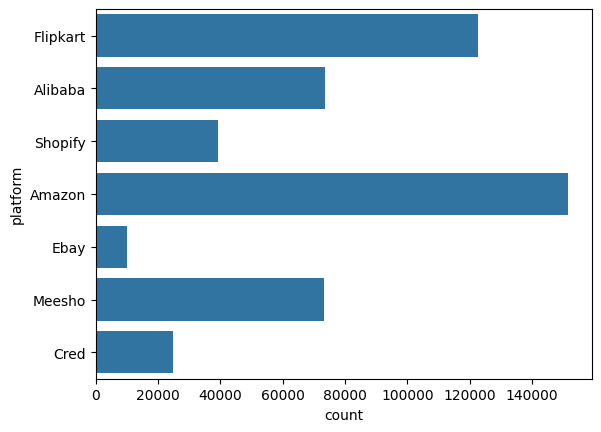

In [77]:
sns.countplot(data=df_trans,y='platform')
plt.show()

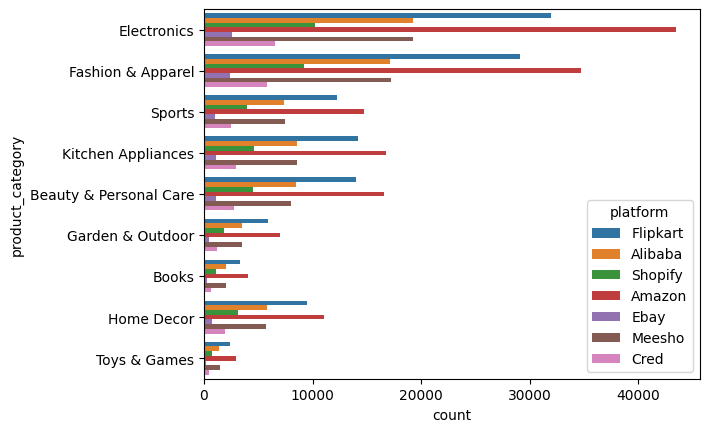

In [78]:
sns.countplot(data=df_trans,y="product_category",hue="platform")
plt.show()

In [79]:
df_trans["platform"].mode()[0]

'Amazon'

In [80]:
df_trans['platform'].fillna(df_trans['platform'].mode()[0],inplace=True)

C:\Users\rsurs\AppData\Local\Temp\ipykernel_51180\977164609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['platform'].fillna(df_trans['platform'].mode()[0],inplace=True)


In [81]:
df_trans['platform'].isnull().sum()

np.int64(0)

### Treating outliers in transaction amount

In [82]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We cannot have 0 as transaction amount

In [83]:
df_trans_zero = df_trans[df_trans['tran_amount'] == 0]
df_trans_zero.shape

(4734, 7)

In [84]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [85]:
print(df_trans_zero[['platform','product_category','payment_type']].value_counts())

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64


In [86]:
df_trans_1 = df_trans[(df_trans['platform'] == "Amazon") & (df_trans['product_category'] == "Electronics") & (df_trans['payment_type'] == "Credit Card")  ]

In [87]:
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [88]:
median_to_replace = df_trans[df_trans['tran_amount'] > 0]['tran_amount'].median()
median_to_replace

np.float64(143.0)

In [89]:
df_trans['tran_amount'].replace(0,median_to_replace,inplace=True)

C:\Users\rsurs\AppData\Local\Temp\ipykernel_51180\2400713182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['tran_amount'].replace(0,median_to_replace,inplace=True)


In [90]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3226.561254
std,144337.711635,288.641924,13098.416709
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,143.000000
75%,375000.250000,752.000000,397.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

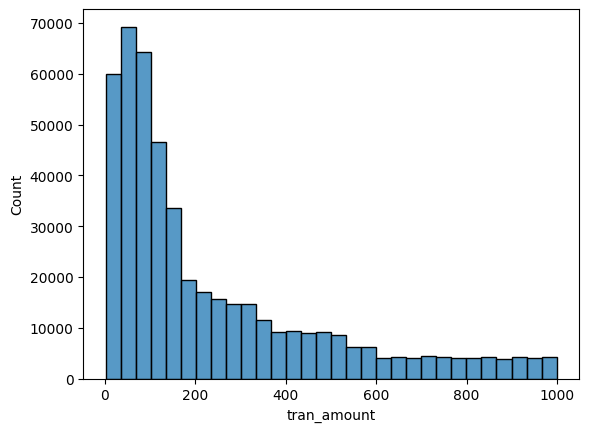

In [91]:
sns.histplot(df_trans[df_trans['tran_amount'] < 10000]['tran_amount'],bins=30)

In [92]:
Q1,Q3 = df_trans['tran_amount'].quantile([0.25,0.75])
IQR = Q3 - Q1 
lower = Q1 - IQR*2
upper = Q3 + IQR*2
print(lower,upper)

-596.0 1059.0


In [93]:
df_tran_outliers = df_trans[df_trans['tran_amount'] >= upper]
df_tran_outliers.shape

(25000, 7)

In [94]:
df_trans_normal = df_trans[df_trans['tran_amount'] < upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [95]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               494.948914
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [96]:
df_trans['tran_amount'] = df_trans['tran_amount'].astype(float)

df_trans.loc[df_tran_outliers.index, 'tran_amount'] = (
    df_tran_outliers['product_category'].map(tran_mean_per_category)
)


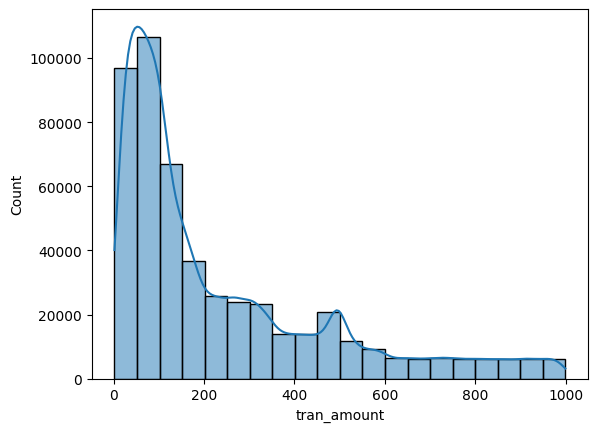

In [97]:
sns.histplot(df_trans['tran_amount'],bins=20,kde=True)
plt.show()

### Data Visualization: Transactions

In [98]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


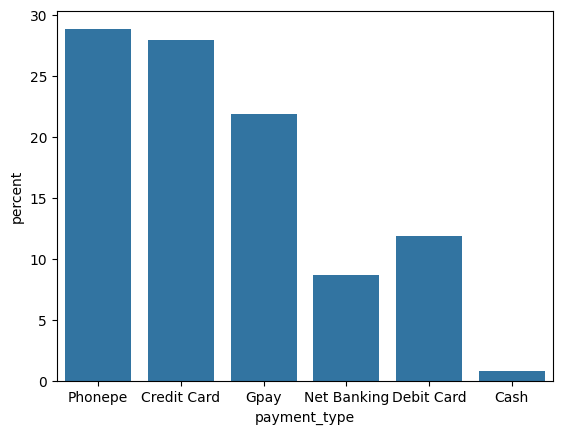

In [99]:
sns.countplot(x=df_trans['payment_type'],stat="percent")
plt.show()

- Majority of the payments are done via phonpe and credit card 
- Very less transactions are done through using cash

In [100]:
df_merged_2 = pd.merge(df_cust,df_trans,on="cust_id",how="inner")
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [101]:
df_merged_2 = pd.merge(df_merged,df_trans,on="cust_id",how="inner")
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


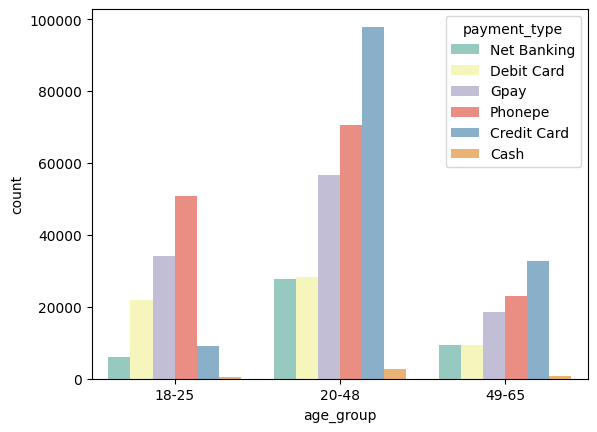

In [103]:
sns.countplot(data=df_merged_2,x="age_group",hue="payment_type",palette='Set3')
plt.show()

We are interested in `age_group` 18-25 there might be an untapped market

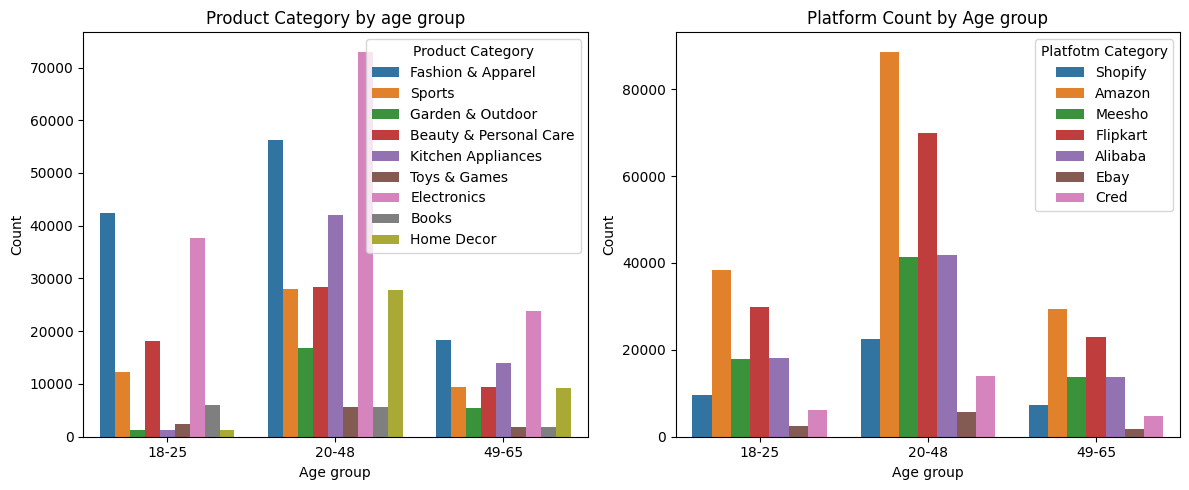

In [106]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="age_group",hue="product_category",data=df_merged_2,ax=ax1)
ax1.set_title("Product Category by age group")
ax1.set_xlabel("Age group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category",loc="upper right")

sns.countplot(data=df_merged_2,x="age_group",hue="platform",ax=ax2)
ax2.set_title("Platform Count by Age group")
ax2.set_xlabel("Age group")
ax2.set_ylabel("Count")
ax2.legend(title="Platfotm Category",loc="upper right")

plt.tight_layout()
plt.show()

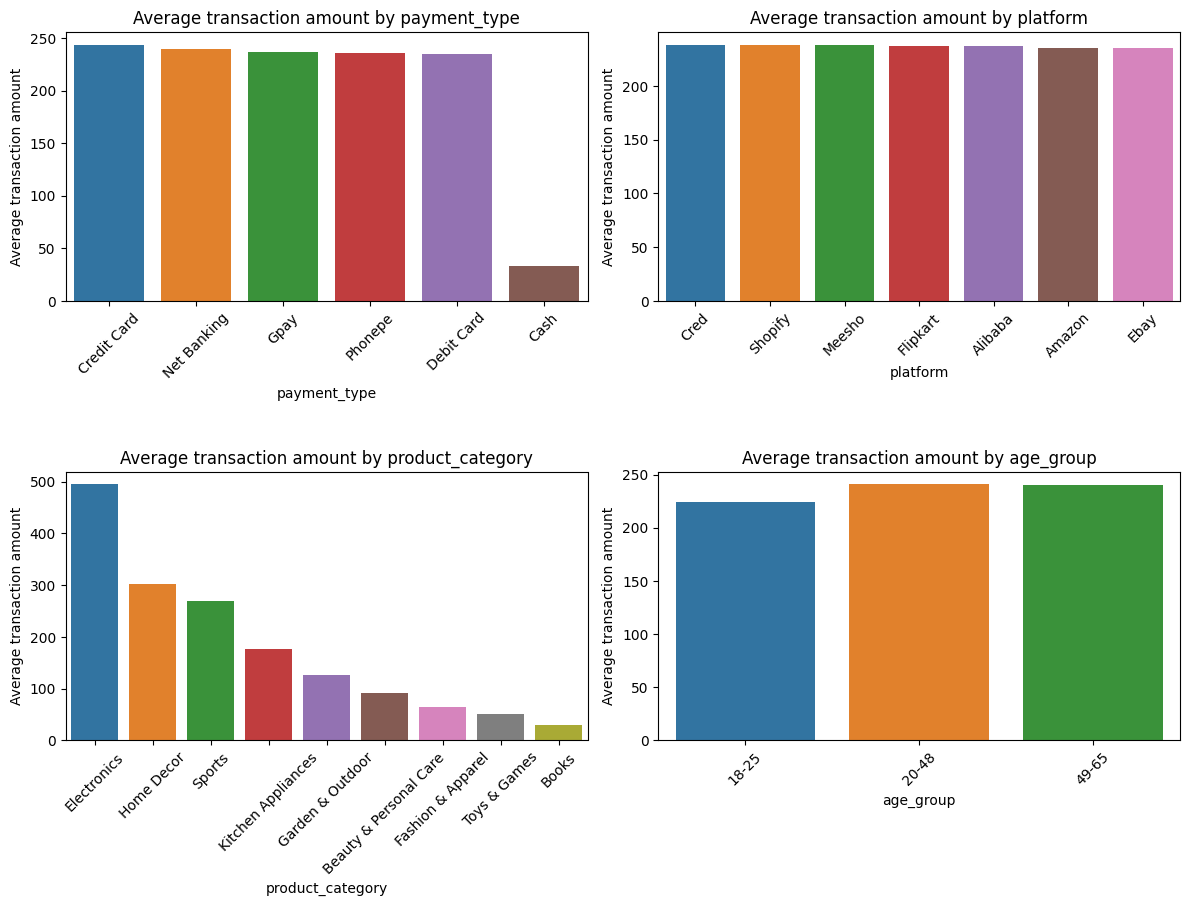

In [109]:
cat_cols = ["payment_type", "platform", "product_category", "age_group"]
num_rows = 3

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
axes = axs.flatten()

for i, col in enumerate(cat_cols):
    avg_tran_amount_by_category = (
        df_merged_2
        .groupby(col, observed=False)["tran_amount"]
        .mean()
        .reset_index()
        .sort_values(by="tran_amount", ascending=False)
    )

    sns.barplot(
        x=col,
        y="tran_amount",
        hue=col,              # required for palette
        data=avg_tran_amount_by_category,
        palette="tab10",
        errorbar=None,        # replaces ci=None
        legend=False,
        ax=axes[i]
    )

    axes[i].set_title(f"Average transaction amount by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Average transaction amount")
    axes[i].tick_params(axis="x", rotation=45)

# Remove unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Target grp: 18-25